In [1]:
import os
import UsefulFunctions as uf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
directory_in_str = 'Data/AncMag/grids'
directory = os.fsencode(directory_in_str)

counter = 0
# anchorage lat lon
anc_lon = -149.8997
anc_lat = 61.2176

# eq = uf.Earthquake('Data/AncMag/grids/AncMag8_0.xml')
# eq_anc_index = uf.getNearestIndex(eq.lons, eq.lats, anc_lon, anc_lat)

# print(eq.warning_times_earlypeak[eq_anc_index])
# print(eq.warning_times_latepeak[eq_anc_index])

In [4]:
counter = 0
data = pd.DataFrame(columns=['name', 'mag', 'duration', 'mmi', 'pga', 'wt_s', 'wt_early_peak', 'wt_late_peak'])

for file in os.listdir(directory):
    filename = os.fsdecode(file)
#     print(f'''{file}
# {filename}''')
    if filename.endswith(".xml"):
        eq = uf.Earthquake(directory_in_str+'/'+filename)
        eq_anc_index = uf.getNearestIndex(eq.lons, eq.lats, anc_lon, anc_lat)
        eq_name = eq.event['event_id'][7:]
        eq_mag = eq.event['magnitude']
        eq_dur = eq.duration
        eq_mmi = eq.mmi[eq_anc_index][0]
        eq_pga = eq.pga[eq_anc_index][0]
        eq_wt_s = eq.warning_times_s[eq_anc_index][0]
        eq_wt_ep = eq.warning_times_earlypeak[eq_anc_index][0]
        eq_wt_lp = eq.warning_times_latepeak[eq_anc_index][0]
        data = data.append({
            'name': eq_name,
            'mag': eq_mag,
            'duration': eq_dur,
            'mmi': eq_mmi,
            'pga': eq_pga,
            'wt_s': eq_wt_s,
            'wt_early_peak': eq_wt_ep,
            'wt_late_peak': eq_wt_lp},
            ignore_index=True)
        counter +=1
        print(f'Done with {counter} grids')
    else:
        continue
        

Start of Parsing for Data/AncMag/grids/AncMag5_6.xml
   ~~Detection stats~~
    Used a maximum azimuthal gap of 300 degrees and minimum station vector angle of 30 km
    Number of stations needed: 4
    Detection Time: 10.390471382105424
    Azimuthal Gap: 130.02708948798164
    Max Vector Angle: 80.78751311817705
    Maximum Epicentral Distance: 51.628669272955044
Finished parsing grid.xml for: M5.6, AncMag5_6, at 2022-08-04T21:29:29 (ID:AncMag/AncMag5_6)
Done with 57 grids
Start of Parsing for Data/AncMag/grids/AncMag7_4.xml
   ~~Detection stats~~
    Used a maximum azimuthal gap of 300 degrees and minimum station vector angle of 30 km
    Number of stations needed: 4
    Detection Time: 10.390471382105424
    Azimuthal Gap: 130.02708948798164
    Max Vector Angle: 80.78751311817705
    Maximum Epicentral Distance: 51.628669272955044
Finished parsing grid.xml for: M7.4, AncMag7_4, at 2022-08-04T21:29:29 (ID:AncMag/AncMag7_4)
Done with 58 grids
Start of Parsing for Data/AncMag/grids/A

In [5]:
data_sorted = data.sort_values(by=['mag'])
data_sorted.to_csv('Data/AncMag/Anc_data.csv')
data_nops = data_sorted[False == data_sorted['name'].str.contains("PS")]
data_nops_upper = data_nops[data_nops['mag'] > 7.3]
data_ps = data_sorted[data_sorted['name'].str.contains("PS")]

In [7]:
data_nops_upper

,name,mag,duration,mmi,pga,wt_s,wt_early_peak,wt_late_peak
1,AncMag7_4,7.4,7.614579,7.7,49.07,-2.213509,0.680031,2.659821
3,AncMag7_5,7.5,8.803308,7.8,52.44,-2.213509,1.131748,3.420608
9,AncMag7_6,7.6,10.177612,7.8,55.10,-2.324895,1.542598,4.188777
8,AncMag7_7,7.7,11.766462,7.9,57.65,-2.324895,2.146361,5.205641
53,AncMag7_8,7.8,13.603351,8.0,64.40,-2.340386,2.828888,6.365759
55,AncMag7_9,7.9,15.727001,8.1,67.32,-2.213509,3.762751,7.851771
37,AncMag8_0,8.0,18.182178,8.1,69.81,-2.324895,4.584333,9.311699


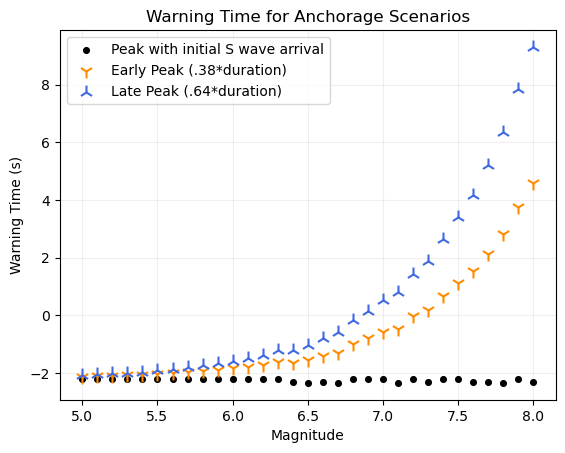

In [8]:
plt.rc('axes', axisbelow=True)
s=100
plt.figure()
plt.scatter(data_nops['mag'].values, data_nops['wt_s'].values, c='k', label='Peak with initial S wave arrival', s=s/6)
plt.scatter(data_nops['mag'].values, data_nops['wt_early_peak'].values, c='darkorange', label='Early Peak (.38*duration)', marker='1', s=s)
plt.scatter(data_nops['mag'].values, data_nops['wt_late_peak'].values, c='royalblue', label= 'Late Peak (.64*duration)', marker='2', s=s)
plt.grid(alpha=0.2)
plt.legend()
plt.xlabel('Magnitude')
plt.ylabel('Warning Time (s)')
plt.title('Warning Time for Anchorage Scenarios')

plt.show()

Text(0, 0.5, 'MMI')

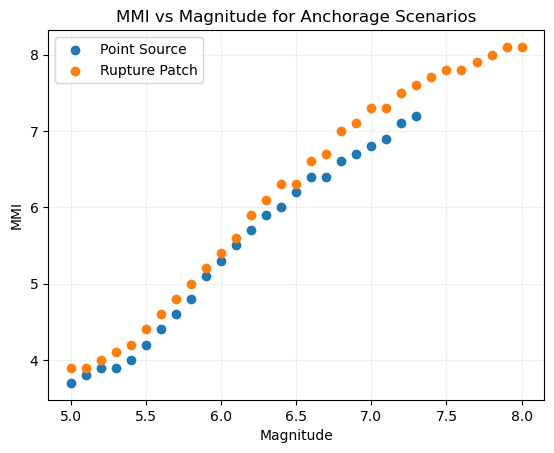

In [9]:
plt.figure()
plt.grid(alpha=0.2)
plt.scatter(data_ps['mag'].values[:-1], data_ps['mmi'].values[:-1], label='Point Source')
plt.scatter(data_nops['mag'].values, data_nops['mmi'], label='Rupture Patch')
plt.legend()
plt.title('MMI vs Magnitude for Anchorage Scenarios')
plt.xlabel('Magnitude')
plt.ylabel('MMI')

Text(0, 0.5, 'PGA')

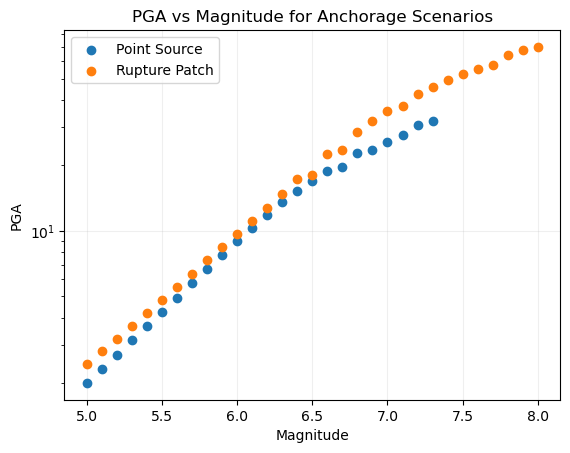

In [10]:
plt.figure()
plt.grid(alpha=0.2)
plt.scatter(data_ps['mag'].values[:-1], data_ps['pga'].values[:-1], label='Point Source')
plt.scatter(data_nops['mag'].values, data_nops['pga'], label='Rupture Patch')
plt.legend()
plt.yscale('log')
plt.title('PGA vs Magnitude for Anchorage Scenarios')
plt.xlabel('Magnitude')
plt.ylabel('PGA')

Text(0, 0.5, 'Warning Time (s)')

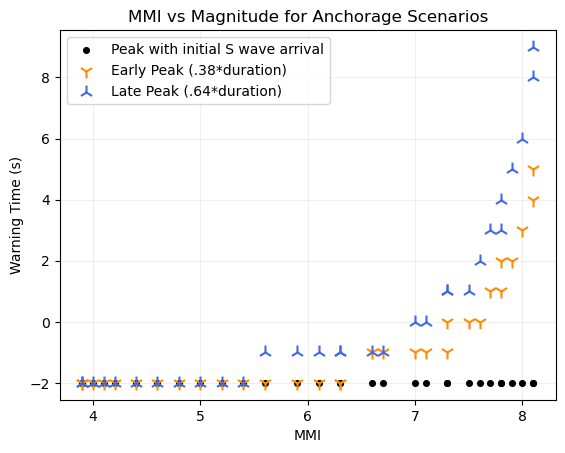

In [66]:
plt.figure()
plt.grid(alpha=0.2)
plt.scatter(data_nops['mmi'].values, data_nops['wt_s'].values, c='k', label='Peak with initial S wave arrival', s=s/6)
plt.scatter(data_nops['mmi'].values, data_nops['wt_early_peak'].values, c='darkorange', label='Early Peak (.38*duration)', marker='1', s=s)
plt.scatter(data_nops['mmi'].values, data_nops['wt_late_peak'].values, c='royalblue', label= 'Late Peak (.64*duration)', marker='2', s=s)
plt.grid(alpha=0.2)
plt.legend()
plt.title('Warning Time vs MMI for Anchorage Scenarios')
plt.xlabel('MMI')
plt.ylabel('Warning Time (s)')

Text(0, 0.5, 'Warning Time (s)')

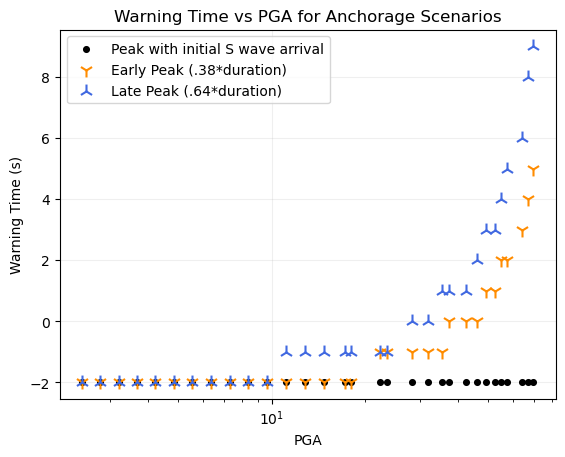

In [67]:
plt.figure()
plt.grid(alpha=0.2)
plt.scatter(data_nops['pga'].values, data_nops['wt_s'].values, c='k', label='Peak with initial S wave arrival', s=s/6)
plt.scatter(data_nops['pga'].values, data_nops['wt_early_peak'].values, c='darkorange', label='Early Peak (.38*duration)', marker='1', s=s)
plt.scatter(data_nops['pga'].values, data_nops['wt_late_peak'].values, c='royalblue', label= 'Late Peak (.64*duration)', marker='2', s=s)
plt.grid(alpha=0.2)
plt.legend()
plt.xscale('log')
plt.title('Warning Time vs PGA for Anchorage Scenarios')
plt.xlabel('PGA')
plt.ylabel('Warning Time (s)')